In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df =pd.read_csv("EmbarkService.csv",parse_dates=['Date']).fillna(0)

In [12]:
display(df)

,Date,Air Corps,Coast Artillery,Armored Force,Field Artillery,Infantry,Chemical Warfare,Engineers,Medical Corps,Army Nurse Corps,Ordnance,Quartermaster Corps,Signal Corps,Transportation Corps,Miscellaneous
0,1941-12-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1942-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1942-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1942-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1942-04-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1942-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1942-06-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1942-07-01,10487,5136,1040,2342,4754,204,13600,3564,44,1542,9157,4365,185,10459
8,1942-08-01,12053,9830,7229,9223,16176,247,21541,5032,62,4137,8658,5985,353,15562
9,1942-09-01,22062,5394,181,2859,15083,35,3916,4644,2,1550,6186,5648,477,16710


In [13]:
df.dtypes


Date                    datetime64[ns]
Air Corps                        int64
Coast Artillery                  int64
Armored Force                    int64
Field Artillery                  int64
Infantry                         int64
Chemical Warfare                 int64
Engineers                        int64
Medical Corps                    int64
Army Nurse Corps                 int64
Ordnance                         int64
Quartermaster Corps              int64
Signal Corps                     int64
Transportation Corps             int64
Miscellaneous                    int64
dtype: object

In [14]:
dfl = pd.melt(df,id_vars='Date',var_name='Service')

In [10]:
dfl.columns

Index(['Date', 'Service', 'value'], dtype='object')

Service  Infantry  Air Corps  Engineers  Field Artillery  Medical Corps   
Year                                                                      
1941            0          0          0                0              0  \
1942        71890      88132      65124            26931          29499   
1943       275721     330480     205911            78688         121048   
1944       869031     384704     285685           239008         185413   
1945       563016     149658      98782            92439          53274   

Service  Quartermaster Corps  Coast Artillery  Signal Corps  Ordnance   
Year                                                                    
1941                       0                0             0         0  \
1942                   40374            36675         29980     18584   
1943                  150114           123421         84603     96092   
1944                  164701           143191        119478    111794   
1945                   50374        

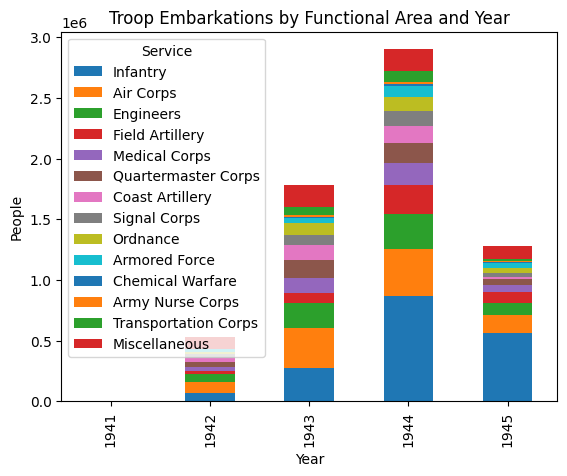

In [28]:
agg_tips = dfl.assign(Year= lambda x: x['Date'].dt.year).sort_values(by='Service').groupby(['Year','Service'])['value'].sum().unstack().fillna(0)
#agg_tips.columns = pd.CategoricalIndex(agg_tips.columns.values, 
#                                 ordered=True, 
#                                 categories=['Infantry','Air Corps','Engineers','Field Artillery','Medical Corps','Quartermaster Corps','Coast Artillery','Signal Corps','Ordnance','Armored Force',
#                                             'Chemical Warfare',
#                                             'Army Nurse Corps',
#                                             'Transportation Corps','Miscellaneous'
#])
agg_tips=agg_tips.reindex(columns=['Infantry','Air Corps','Engineers','Field Artillery','Medical Corps','Quartermaster Corps','Coast Artillery','Signal Corps','Ordnance','Armored Force',
                                             'Chemical Warfare',
                                             'Army Nurse Corps',
                                             'Transportation Corps','Miscellaneous'])
#agg_tips = agg_tips.sort_index(axis=1)
agg_tips.plot(kind='bar', stacked=True)
plt.title('Troop Embarkations by Functional Area and Year')
plt.xticks(rotation=90, ha='center')
plt.ylabel('People')
print(agg_tips)